In [1]:
# import matplotlib.pyplot as plt


# fig, ax = plt.subplots()
# # fig.subplots_adjust(right=0.75)

# twin0 = ax.twinx()
# twin1 = ax.twinx()
# twin2 = ax.twinx()


# # Offset the right spine of twin2.  The ticks and label have already been
# # placed on the right by twinx above.

# twin0.spines.right.set_position(("axes", 1))
# twin1.spines.right.set_position(("axes", 1.25))
# twin2.spines.right.set_position(("axes", 1.5))

# p1, = twin0.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
# p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
# p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")


# ax.set_xlabel("Distance")
# twin0.set_ylabel("Density")
# twin1.set_ylabel("Temperature")
# twin2.set_ylabel("Velocity")

# twin0.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

# tkw = dict(size=4, width=1.5)
# twin0.tick_params(axis='y', colors=p1.get_color(), **tkw)
# twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
# twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# ax.tick_params(axis='x', **tkw)

# ax.legend(handles=[p1, p2, p3])

# plt.show()

In [2]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import numpy as np

# %matplotlib widget

# x = np.linspace(0, 2*np.pi, 100)
# y = np.sin(x)

# fig, ax = plt.subplots()
# line, = ax.plot([])     # A tuple unpacking to unpack the only plot
# ax.set_xlim(0, 2*np.pi)
# ax.set_ylim(-1.1, 1.1)

# def animate(frame_num):
#     y = np.sin(x + 2*np.pi * frame_num/100)
#     line.set_data((x, y))
#     return line

# anim = FuncAnimation(fig, animate, frames=100, interval=20)
# plt.show()

In [3]:
# import matplotlib.pyplot as plt

# plt.ion()
# plt.figure()
# for i in range(100):
#     plt.plot([i], [i], 'o')
#     plt.draw()
#     plt.pause(0.0001)

In [4]:
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# fig = plt.figure()
# ax = fig.add_subplot(111)

# # some X and Y data
# x = [0]
# y = [0]

# li, = ax.plot(x, y,'o')

# # draw and show it
# fig.canvas.draw()
# plt.show(block=False)

# # loop to update the data
# for i in range(100):
#     try:
#         x.append(i)
#         y.append(i)

#         # set the new data
#         li.set_xdata(x)
#         li.set_ydata(y)

#         ax.relim() 
#         ax.autoscale_view(True,True,True) 

#         fig.canvas.draw()

#         time.sleep(0.01)
#     except KeyboardInterrupt:
#         plt.close('all')
#         break

In [5]:
# from csv import DictWriter
 
# # list of column names
# field_names = ['ID', 'NAME', 'RANK',
#                'ARTICLE', 'COUNTRY']
 
# # Dictionary that we want to add as a new row
# dict = {'ID': 6, 'NAME': 'William', 'RANK': 5532,
#         'ARTICLE': 1, 'COUNTRY': 'UAE'}
 
# # Open CSV file in append mode
# # Create a file object for this file
# with open('event.csv', 'a') as f_object:
 
#     # Pass the file object and a list
#     # of column names to DictWriter()
#     # You will get a object of DictWriter
#     dictwriter_object = DictWriter(f_object, fieldnames=field_names)
 
#     # Pass the dictionary as an argument to the Writerow()
#     dictwriter_object.writerow(dict)
 
#     # Close the file object
#     f_object.close()

In [6]:
# from openfoam.graph import to_csv


# logger = to_csv("./test.csv", ["a", "b", "c", "d", "e"])
# logger([1, 2], 0, [3, 4])
# logger([1, 2], 0, [3, 4])
# logger([1, 2], 2, [9, 4])
# logger([1, 2], 4, [3, 4])
# logger([1, 2], 5, [3, 4])
# logger([1, 9], 6, [3, 4])
# logger([1, 2], 0, [5, 4])
# logger([1, 2], 0, [3, 4])

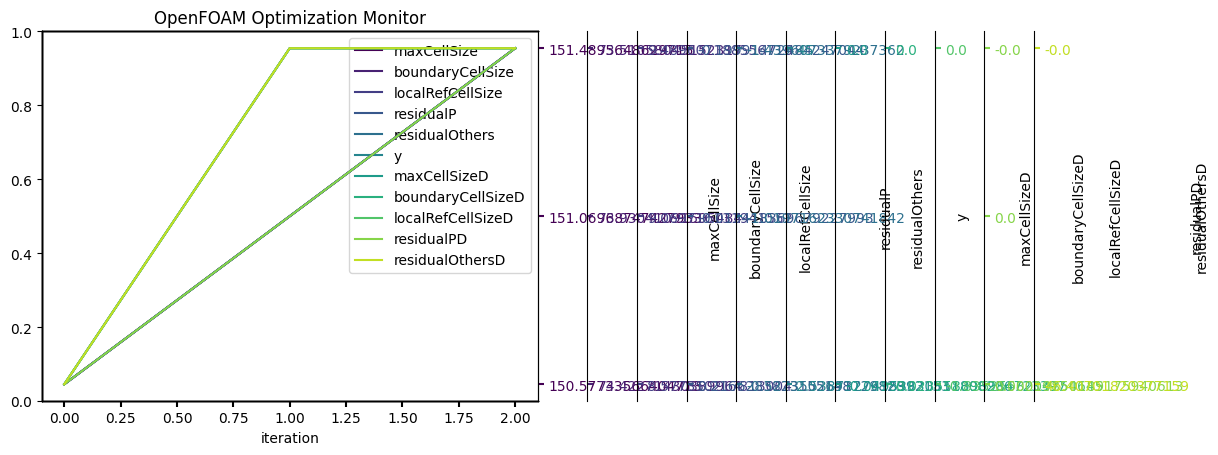

In [1]:
from csv import reader
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from more_itertools import consume, side_effect, transpose
from openfoam.graph import plot_csv

from more_itertools import consume, side_effect, transpose

file_path = "./optimize.csv"
title = "OpenFOAM Optimization Monitor"

lines = []
with open(file_path, "r") as f:
    lines = list(reader(f))

header = lines[0]
rows = lines[1:]
cols = transpose(rows)

fig, ax = plt.subplots()

twins = list(map(lambda _: ax.twinx(), header))

n = len(header)
colormap = plt.cm.viridis
colors = list(map(lambda x: colormap(int(x * colormap.N/n)), range(n)))

idxs = range(len(rows))

positions = list(map(lambda i: 1 + i * 0.1, range(n)))
consume(side_effect(lambda t: t[0].spines.right.set_position(("axes", t[1])), zip(twins, positions)))

ps = list(map(lambda t: (t[0].plot(idxs, t[1], color=t[2], label=t[3]))[0], zip(twins, cols, colors, header)))

ax.set_xlabel("iteration")
consume(side_effect(lambda t: t[0].set_ylabel(t[1]), zip(twins, header)))

tkw = {
    "size": 4,
    "width": 1.5
}

ax.tick_params(axis='x', **tkw)
consume(side_effect(lambda t: t[0].tick_params(axis="y", colors=t[1].get_color(), **tkw), zip(twins, ps)))

ax.legend(handles=ps)
ax.set_title(title)

plt.show()

/tmp/ipykernel_742400/4080003054.py:69: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, animate, interval=20)


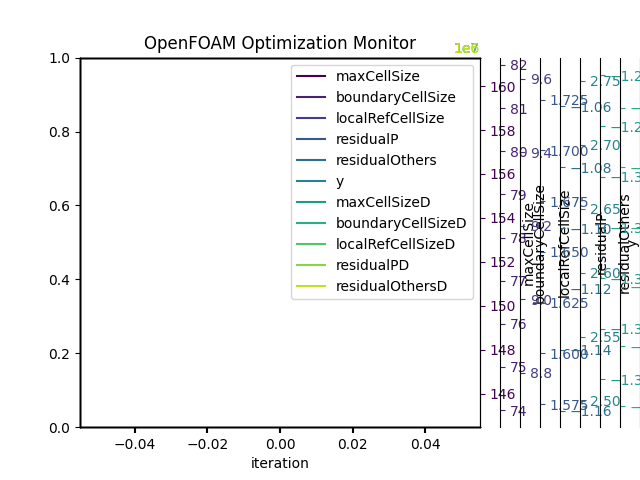

In [2]:
# from csv import reader
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from more_itertools import consume, side_effect, transpose
# from openfoam.graph import plot_csv

# %matplotlib widget

# file_path = "./optimize.csv"
# title = "OpenFOAM Optimization Monitor"

# lines = []
# with open(file_path, "r") as f:
#     lines = list(reader(f))

# header = lines[0]
# rows = lines[1:]
# cols_str = list(transpose(rows))
# cols = list(map(lambda c:list(map(float, c)), cols_str))

# fig, ax = plt.subplots()
# fig.subplots_adjust(right=0.75)

# twins = list(map(lambda _: ax.twinx(), header))

# n = len(header)
# colormap = plt.cm.viridis
# colors = list(map(lambda x: colormap(int(x * colormap.N/n)), range(n)))

# idxs = list(range(len(rows)))

# # twins[1].spines.right.set_position(("axes", 1.25)) 
# positions = list(map(lambda i: 1 + i * 0.05, range(n)))
# consume(side_effect(lambda t: t[0].spines.right.set_position(("axes", t[1])), zip(twins, positions)))

# ps = list(map(lambda t: (t[0].plot(idxs, t[1], color=t[2], label=t[3]))[0], zip(twins, cols, colors, header)))

# ax.set_xlabel("iteration") 
# consume(side_effect(lambda t: t[0].set_ylabel(t[1]), zip(twins, header))) 

# tkw = {
#     "size": 4,
#     "width": 1.5
# }

# ax.tick_params(axis='x', **tkw)
# consume(side_effect(lambda t: t[0].tick_params(axis="y", colors=t[1].get_color()), zip(twins, ps)))

# ax.legend(handles=ps)
# ax.set_title(title)

# def animate(frame_num):
#     lines = []
#     with open(file_path, "r") as f:
#         lines = list(reader(f))
        
#     rows = lines[1:]
#     cols_str = list(transpose(rows))
#     cols = list(map(lambda c:list(map(float, c)), cols_str))    
#     idxs = list(range(len(rows)))

#     consume(side_effect(lambda x: x.clear(), twins))
#     consume(side_effect(lambda t: t[0].spines.right.set_position(("axes", t[1])), zip(twins, positions)))
#     ps = list(map(lambda t: (t[0].plot(idxs, t[1], color=t[2], label=t[3]))[0], zip(twins, cols, colors, header)))
    

#     return ps

# anim = FuncAnimation(fig, animate, interval=20)

# plt.show()

<class 'numpy.ndarray'>


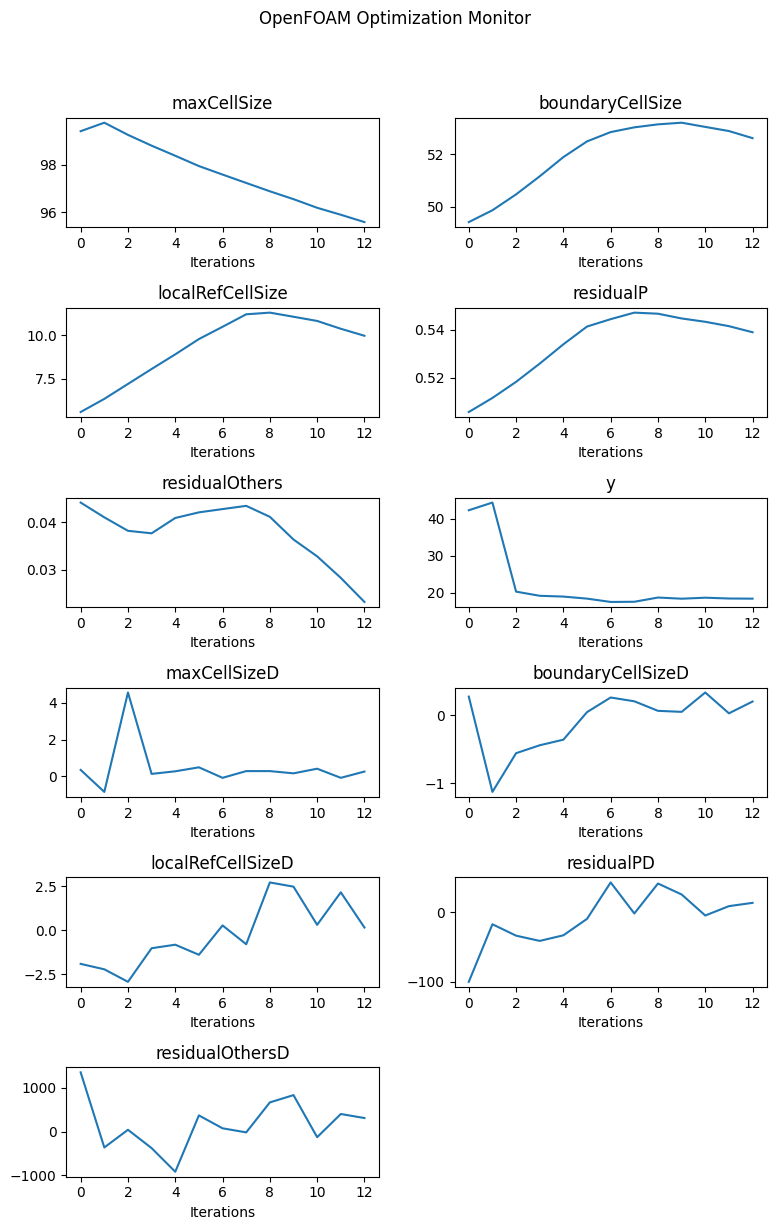

In [41]:
import matplotlib.pyplot as plt
import csv

# Open the CSV file
with open('optimize.csv', 'r') as file:
    # Read the CSV data
    reader = csv.reader(file)
    # Get the header row
    header = next(reader)
    # Initialize a list to store the data
    data = []

    # Iterate over the remaining rows in the CSV file
    for row in reader:
        # Convert the row values to floats and append them to the data list
        data.append([float(value) for value in row])

# Get the number of columns in the data
num_columns = len(data[0])

# Calculate the number of rows and columns for the subplots
num_rows = (num_columns + 1) // 2  # Round up if the number of columns is odd
num_cols = 2

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2.5 * int(num_columns/2 + 0.1)))
fig.suptitle("OpenFOAM Optimization Monitor\n\n\n")

# Flatten the axes array if there is only one row or one column
axes = axes.flatten()

print(type(axes))

# Iterate over the columns and plot each one as a separate subplot
for i, column in enumerate(header):
    # Get the current subplot axis
    ax = axes[i]
    # Extract the values for the current column
    values = [row[i] for row in data]
    # Plot the values on the current subplot
    ax.plot(values)
    ax.set_xlabel('Iterations')
    # ax.set_ylabel('Values')
    ax.set_title(column)

# Hide any unused subplots
for j in range(num_columns, len(axes)):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig("optimize_2.png")
# Show the plot
plt.show()
